In [1]:
import os
os.chdir('../')

In [2]:
from viz.utils import *
from main import run_vehicle

# QFedAvgServer

In [10]:
train_dir='data/vehicle/train/'
test_dir='data/vehicle/test/'
configs={
    # Model configs
    'layer_sizes': [100,1], 'act_funcs': ['none'],
    'dataset_name': 'vehicle',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 20,
    'pct_client_per_round': 10.0/23.0,
    'num_epochs': 1,
    'batch_size': 64,
    'lr': 0.01,
    's':0.1,
    'q': 5,
    'disable_tqdm':False
}

server, clients = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:03<00:00,  6.60it/s]


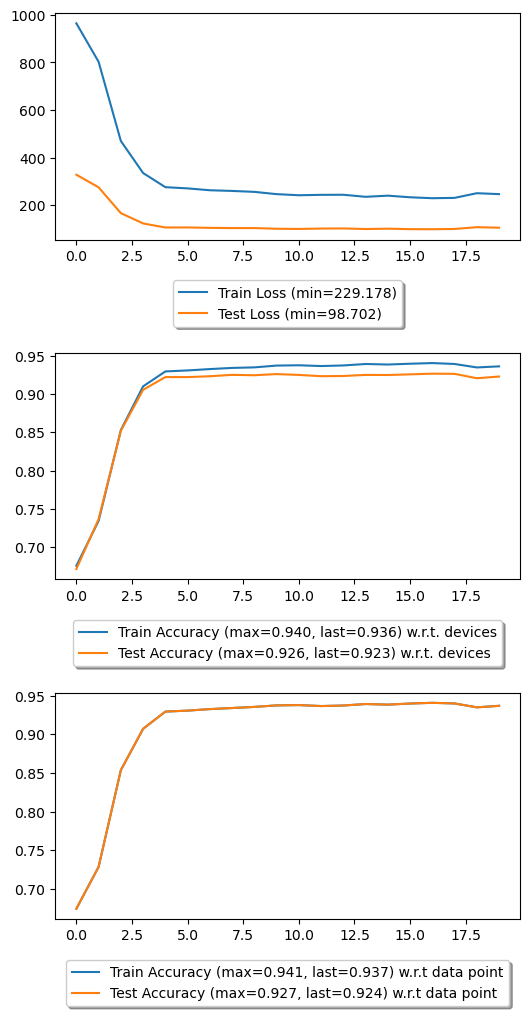

In [4]:
df = get_results_from_server(server)
g = plot_by_round(df)

# DL_FedAvgServer

In [5]:
train_dir='data/vehicle/train/'
test_dir='data/vehicle/test/'
configs={
    # Model configs
    'layer_sizes': [100,1], 'act_funcs': ['none'],
    'dataset_name': 'vehicle',
    'method_name': 'DL_FedAvgServer',
    # Server configs
    'num_rounds': 20,
    'pct_client_per_round': 10.0/23.0,
    'num_epochs': 1,
    'batch_size': 64,
    'lr': 0.01,
    's':5.0,
    'disable_tqdm':False
}

server, clients = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:02<00:00,  7.69it/s]


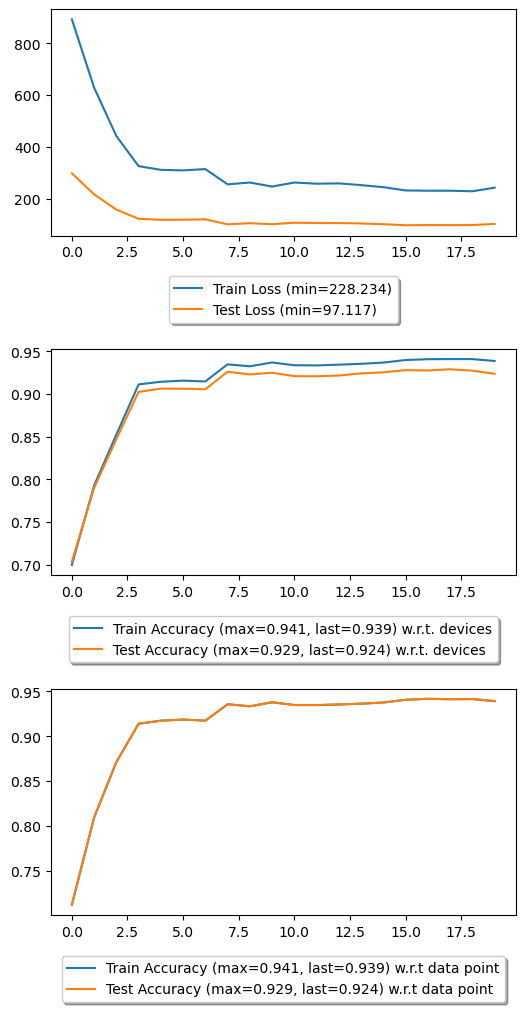

In [6]:
df = get_results_from_server(server)
g = plot_by_round(df)

# Benchmark

In [11]:
train_dir='data/vehicle/train/'
test_dir='data/vehicle/test/'
configs={
    # Model configs
    'layer_sizes': [100,1], 'act_funcs': ['none'],
    'dataset_name': 'vehicle',
    'method_name': 'QFedAvgServer',
    # Server configs
    'num_rounds': 20,
    'pct_client_per_round': 10.0/23.0,
    'num_epochs': 1,
    'batch_size': 64,
    'lr': 0.01,
    's':0.1,
    'q': 5,
    'disable_tqdm':False
}

# server, clients = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:02<00:00,  7.53it/s]


# q=0

In [13]:
# q=0
configs['q'] = 0
server_q0, clients_q_0 = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:02<00:00,  7.52it/s]


In [14]:
res_q0 = {
    'q': 0
}
q0_resdf = get_results_from_server(server_q0)
res_q0.update(fairness_result(q0_resdf))

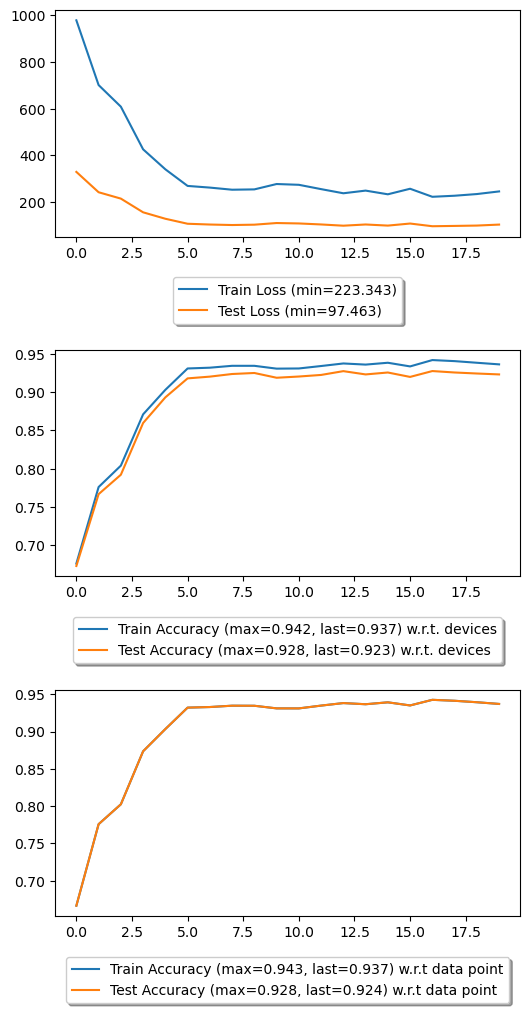

In [15]:
_ = plot_by_round(q0_resdf)

# q=1

In [18]:
# q=1
configs['q'] = 5.0
server_q1, clients_q1 = run_vehicle(train_dir, test_dir, configs, report=False)

100%|██████████| 20/20 [00:02<00:00,  7.25it/s]


In [20]:
res_q1 = {
    'q': 5.0
}
q1_resdf = get_results_from_server(server_q1)
res_q1.update(fairness_result(q1_resdf))

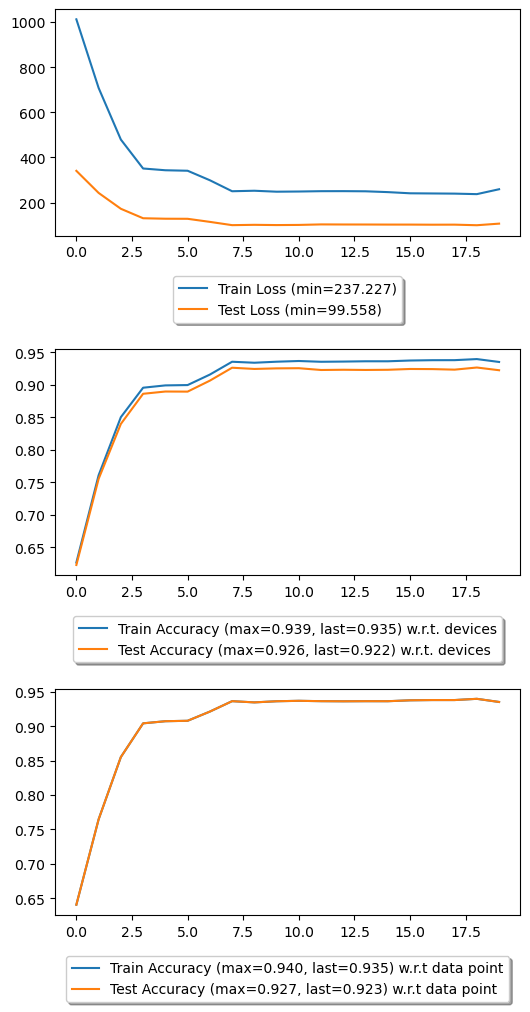

In [21]:
_ = plot_by_round(q1_resdf)

In [22]:
resdf = pd.DataFrame([res_q0, res_q1])

In [23]:
resdf

,q,subset,avg_acc,worst_10,best_10,variance
0,0.0,test,89.187632,86.472687,97.826701,8.654483
1,5.0,test,89.329887,85.159541,97.378479,10.897949
